<a href="https://colab.research.google.com/github/Fecarvalho00/Creditcard_fraud_analysis/blob/main/creditcard_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Projetos Ciencia de dados/Fraude/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Análise Exploratória dos dados

In [ ]:
print("O dataset tem {} linhas e {} colunas".format(df.shape[0], df.shape[1]))

O dataset tem 284807 linhas e 31 colunas


In [ ]:
count_classes = df['Class'].value_counts()
print(count_classes)

Class
0    284315
1       492
Name: count, dtype: int64


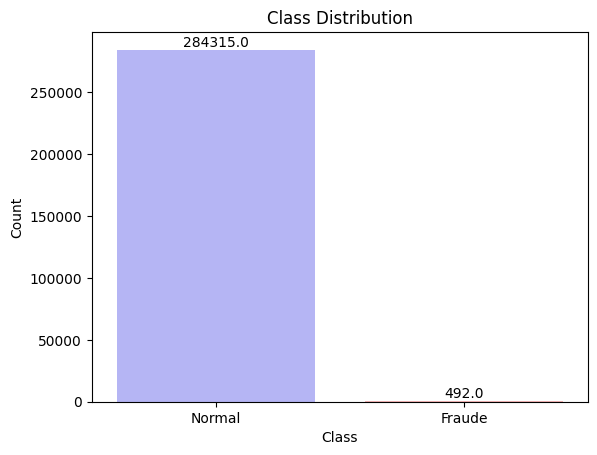

In [ ]:
labels = ['Normal', 'Fraude']

ax = sns.countplot(data = df, x='Class', palette = 'bwr')
ax.set_xticklabels(labels)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# Adding counts on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.grid(False)
plt.show()


Analisando a distribuição dos valores das transações e o tempo de cada transação para situações normais e fraudulentas




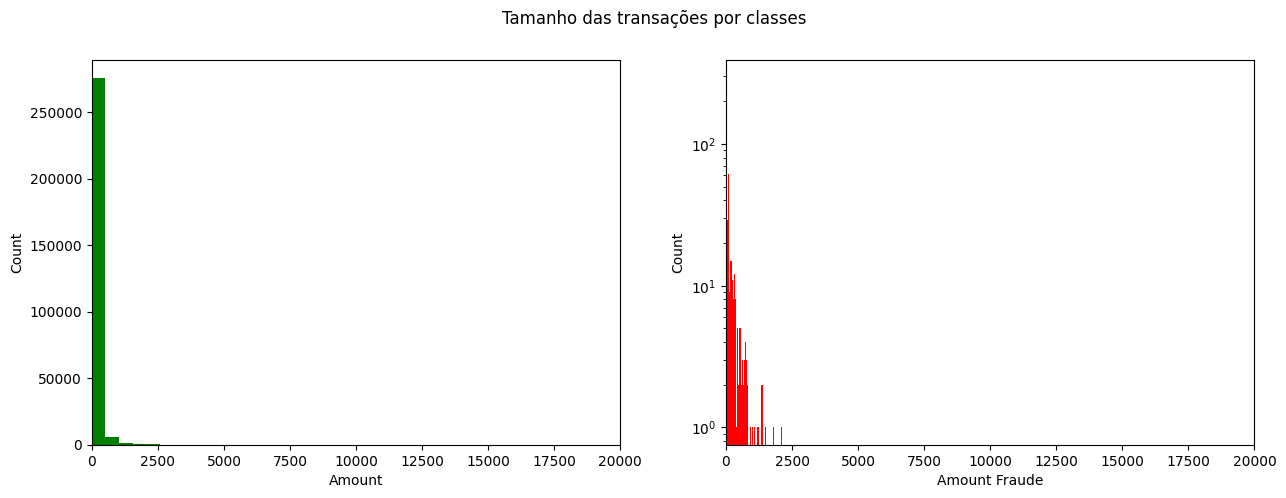

In [ ]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex = True)

figure.suptitle('Tamanho das transações por classes')

bins = 50

ax1.hist(df[df['Class'] == 0]['Amount'], bins=bins, color='g',
         label='Normal')

ax2.hist(df[df['Class'] == 1]['Amount'], bins=bins, color='r',
         label='Fraude')

ax1.set_xlabel('Amount')
ax1.set_ylabel('Count')
ax2.set_xlabel('Amount Fraude')
ax2.set_ylabel('Count')

plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

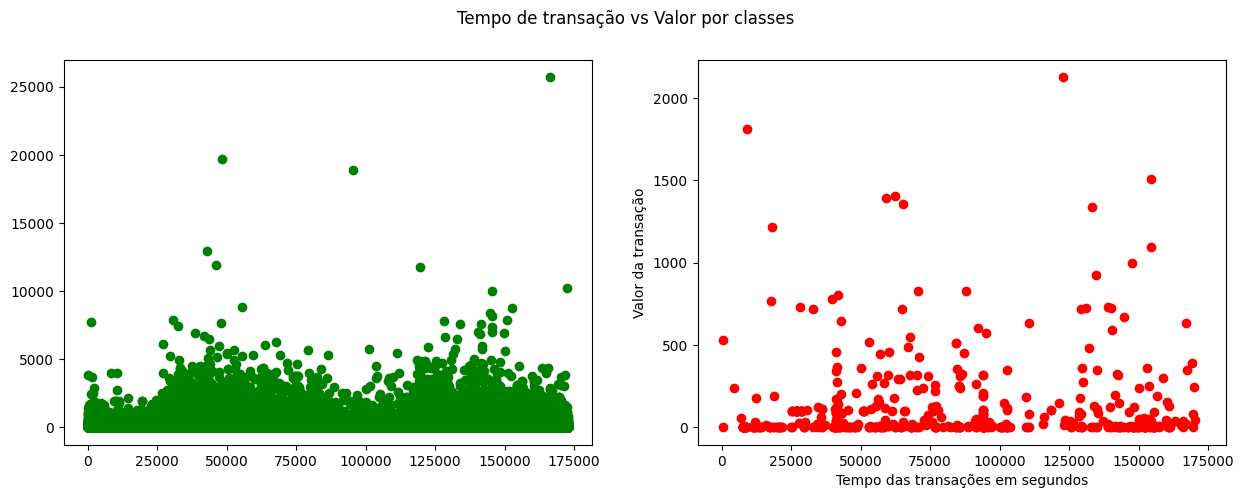

In [ ]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex = True)

figure.suptitle('Tempo de transação vs Valor por classes')

ax1.scatter(df[df['Class'] == 0]['Time'], df[df['Class'] == 0]['Amount'], color='g',
         label='Normal')

ax2.scatter( df[df['Class'] == 1]['Time'], df[df['Class'] == 1]['Amount'], color='r',
         label='Fraude')

plt.xlabel('Tempo das transações em segundos')
plt.ylabel('Valor da transação')

#plt.yscale('log')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

robust_scaler = RobustScaler()

# This transformation helps in reducing the impact of outliers by scaling
#the data based on the interquartile range (IQR)
df['Amount'] = robust_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))


# Similarly, the 'Time' data is scaled to manage
#potential outliers and make the data more suitable for modeling
df['Time'] = robust_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Verificando o dataset transformado.
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [ ]:
#Separação entre variáveis de treino e variáveis de teste.
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

strat_kfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


for Xi_train, Xi_test in strat_kfold.split(X, y):
    print("TRAIN:", Xi_train, "TEST:", Xi_test)
    # Extraindo features de treino e testes.
    X_train, X_test = X.iloc[Xi_train], X.iloc[Xi_test]
    # Extraindo labels de treino e testes.
    y_train, y_test = y.iloc[Xi_train], y.iloc[Xi_test]

#Convertendo treino e test para Arrays

X_train = X_train.values
X_test = X_test.values
Y_train = y_train.values
y_test = y_test.values


label_train_unique, label_count_train = np.unique(y_train, return_counts=True)
label_test_unique, label_count_test = np.unique(y_test, return_counts=True)


TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


In [ ]:
print("Distribuição das classes")
print("Treino:", label_count_train)
print("Teste:", label_count_test)


Distribuição das classes
Treino: [227452    394]
Teste: [56863    98]


In [ ]:
print("Proporção das classes")
print(label_count_train / len(y_train))
print(label_count_test / len(y_test))

Proporção das classes
[0.99827076 0.00172924]
[0.99827952 0.00172048]


Podemos observar que os dados estão apresentados de forma desbalanceada: 99% dos dados são de transações normais e cerca de menos de 1% estão para fraude

Treinar o modelo para detectar fraude com os dados desbalanceados pode ocasionar problemas na detecção de fraudes.

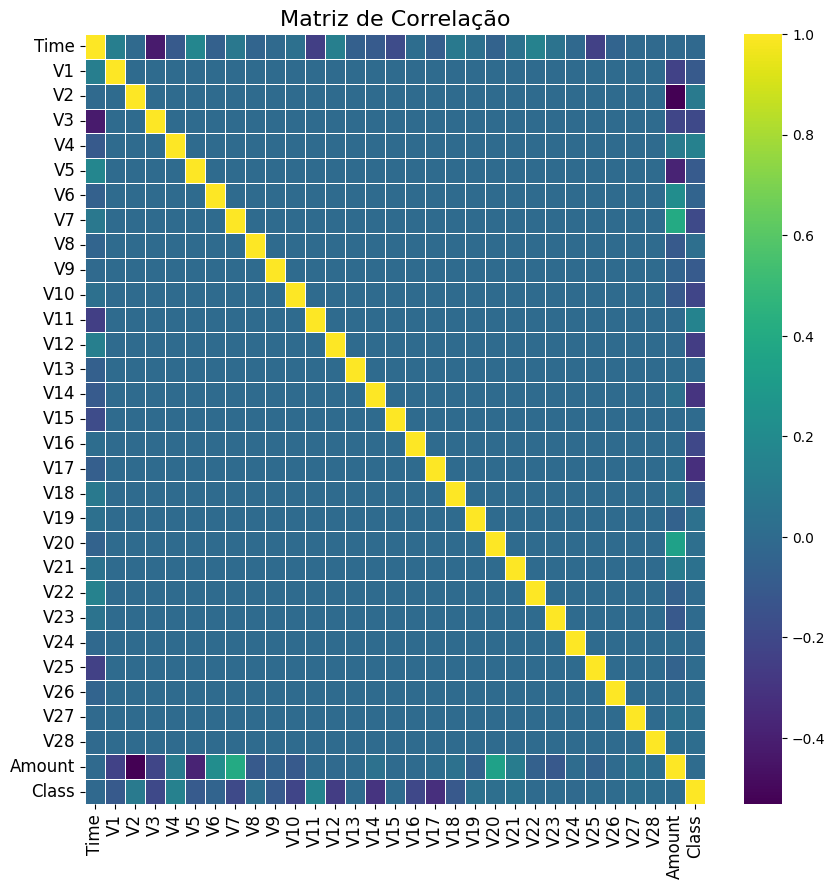

<Figure size 640x480 with 0 Axes>

In [ ]:
correlacao = df.corr()  # Matriz de Correlação dos dados

plt.figure(figsize=(10, 10))

sns.heatmap(correlacao, annot=False, cmap='viridis', linewidths=.5)
plt.title("Matriz de Correlação", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Observe a correlação dos dados quando estão desbalanceados. Vamos balancear os dados e observar novamente a nova correlação.

### Criando um dataset balanceado.

Para balancear os dados iremos utilizar um subconjunto da classe com maioritária e criar um conjunto de dados mais equilibrado em relação a transação normal e transação fraudulenta.

In [ ]:
data = df.sample(frac = 1)

size_fraude = len(data[data['Class'] == 1])

# Extraindo as linhas de dados fraudulentos.
data_fraude = data.loc[data['Class'] == 1]

# Extrair linhas dos dados de transações normais, de forma proporcional ao de fraudulentos.
data_normal = data.loc[data['Class'] == 0][:size_fraude]

Uma técnica que também pode ser utilizada é aumentar o conjunto de dados fraudulentos.

In [ ]:
new_data = pd.concat([data_fraude, data_normal])
new_data = new_data.sample(frac=1, random_state = 42)

In [ ]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
228712,0.715833,-1.303488,1.227114,0.363434,-0.369362,-1.356856,-0.494550,-0.905492,1.207338,0.269356,...,0.314835,0.662293,0.196701,0.071404,-0.532831,-0.507386,-0.455947,-0.185712,0.013135,0
6446,-0.904851,0.702710,2.426433,-5.234513,4.416661,-2.170806,-2.667554,-3.878088,0.911337,-0.166199,...,0.551180,-0.009802,0.721698,0.473246,-1.959304,0.319476,0.600485,0.129305,-0.293440,1
51272,-0.467874,-0.331254,0.492126,1.173345,-1.152008,0.017849,-0.589573,0.525695,-0.160167,-2.262232,...,0.281243,0.697128,-0.478960,0.052613,0.647675,0.051473,0.025741,0.042440,-0.139733,0
8972,-0.849387,-4.064005,3.100935,-1.188498,3.264633,-1.903562,0.320351,-0.954940,-3.277535,2.820829,...,1.688665,-0.078845,0.193731,0.479496,-0.506603,-0.409863,-3.036271,-0.630605,2.203032,1
156988,0.289066,0.745153,2.809299,-5.825406,5.835566,0.512320,-0.615622,-2.916576,0.776710,-1.878832,...,0.284841,-0.874383,-0.083995,-0.651442,0.454594,0.050376,0.756953,0.383869,-0.307413,1


In [ ]:
new_data.shape

(984, 31)

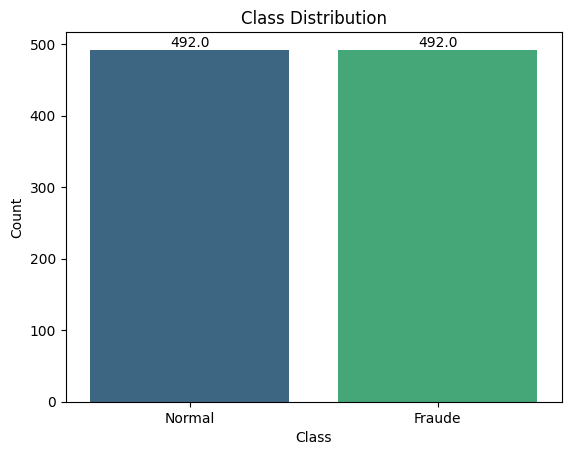

In [ ]:
labels = ['Normal', 'Fraude']

ax = sns.countplot(data = new_data, x='Class', palette = 'viridis')
ax.set_xticklabels(labels)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# Adding counts on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.grid(False)
plt.show()

## Observe a nova correlação entre os dados

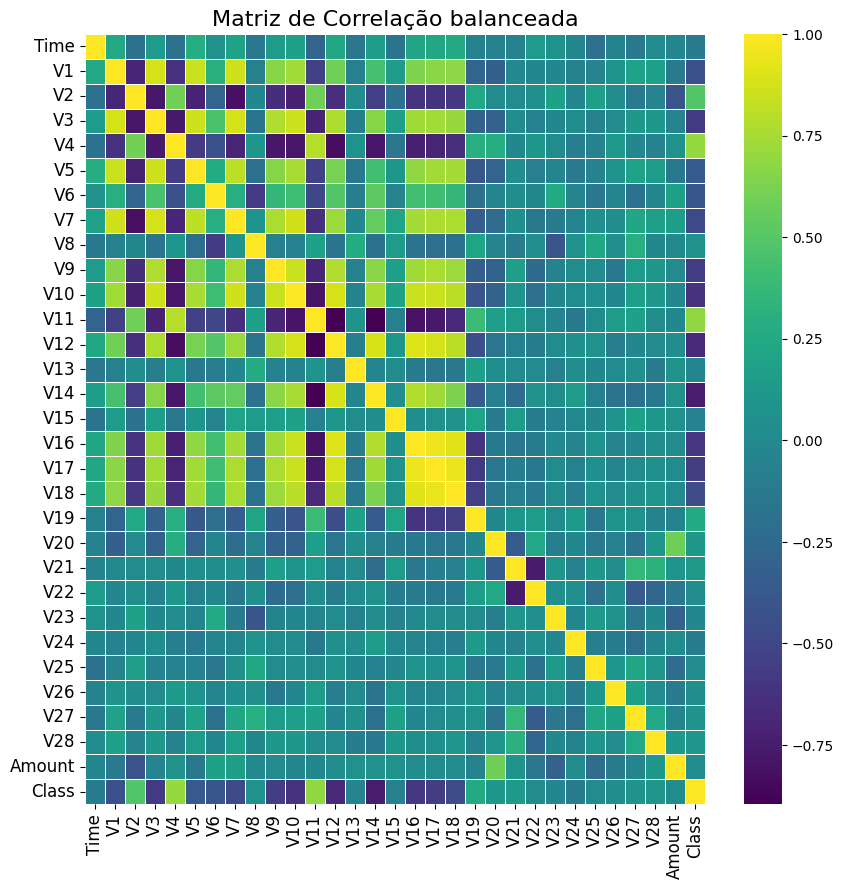

<Figure size 640x480 with 0 Axes>

In [ ]:
correlacao_balanced = new_data.corr()  # Matriz de Correlação dos dados

plt.figure(figsize=(10, 10))

sns.heatmap(correlacao_balanced, annot=False, cmap='viridis', linewidths=.5)
plt.title("Matriz de Correlação balanceada", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()